# walmart

In [346]:
import sys
sys.path.append('..')

In [347]:
# imoports
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch

In [348]:
# constants

FEATURES_DATA_FILE = '../data/features.csv'
STORES_DATA_FILE = '../data/stores.csv'
TRAIN_DATA_FILE = '../data/train.csv'
TEST_DATA_FILE = '../data/test.csv'

## Load the data

In [349]:
features_df = pd.read_csv(FEATURES_DATA_FILE)
store_df = pd.read_csv(STORES_DATA_FILE)
train_original_df = pd.read_csv(TRAIN_DATA_FILE)

In [350]:
features_df["Date"] = features_df["Date"].apply(pd.to_datetime)
train_original_df["Date"] = train_original_df["Date"].apply(pd.to_datetime)

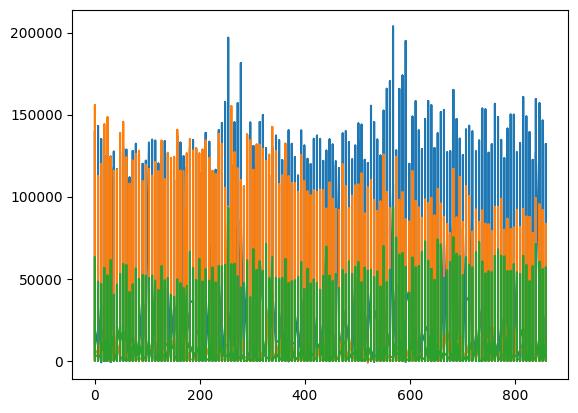

In [351]:
view_df = train_original_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df["DN"] = (view_df["DN"] / 100000000000000).astype(int)
view_df["DN"] = view_df["DN"] - view_df["DN"].min()

view_df = view_df.sort_values(by=["DN"])

for store in view_df["Store"].sort_values().unique():
    if int(store) in [1, 3, 5]:
        x = view_df[view_df["Store"] == store]["DN"]
        y = view_df[view_df["Store"] == store]["Weekly_Sales"]
        plt.plot(x, y)



In [352]:
df = train_original_df.copy()

In [353]:
df = df[(df["Store"] == 1) & (df["Dept"] == 1)]

# Combine the tables

In [354]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [355]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [356]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [357]:
df = df.merge(store_df, on="Store")
df = df.merge(features_df, on=["Store", "Date"])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,1,2012-09-28,18947.81,False,A,151315,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,False
139,1,1,2012-10-05,21904.47,False,A,151315,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,223.181477,6.573,False
140,1,1,2012-10-12,22764.01,False,A,151315,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,False
141,1,1,2012-10-19,24185.27,False,A,151315,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,223.425723,6.573,False


In [358]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column, df[column].isna().sum())
        df = df.drop(columns=[column])

df

MarkDown1 92
MarkDown2 101
MarkDown3 93
MarkDown4 92
MarkDown5 92


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,1,2012-09-28,18947.81,False,A,151315,76.08,3.666,222.981658,6.908,False
139,1,1,2012-10-05,21904.47,False,A,151315,68.55,3.617,223.181477,6.573,False
140,1,1,2012-10-12,22764.01,False,A,151315,62.99,3.601,223.381296,6.573,False
141,1,1,2012-10-19,24185.27,False,A,151315,67.97,3.594,223.425723,6.573,False


## First Describe of the data

In [359]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,False


In [360]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,143.0,143,143.000000,143.0,143.000000,143.000000,143.000000,143.000000
mean,1.0,1.0,2011-06-17 00:00:00,22513.322937,151315.0,68.306783,3.219699,215.996892,7.610420
min,1.0,1.0,2010-02-05 00:00:00,14537.370000,151315.0,35.400000,2.514000,210.337426,6.573000
25%,1.0,1.0,2010-10-11 12:00:00,16494.630000,151315.0,58.265000,2.764500,211.549277,7.348000
50%,1.0,1.0,2011-06-17 00:00:00,18535.480000,151315.0,69.640000,3.290000,215.459905,7.787000
75%,1.0,1.0,2012-02-20 12:00:00,23214.215000,151315.0,80.485000,3.594000,220.531330,7.838000
max,1.0,1.0,2012-10-26 00:00:00,57592.120000,151315.0,91.650000,3.907000,223.444251,8.106000
std,0.0,0.0,NaN,9854.349032,0.0,14.250486,0.427313,4.350890,0.383749


In [361]:
df["IsHoliday"] = df["IsHoliday_x"]
df = df.drop(columns=["IsHoliday_x", "IsHoliday_y"])

In [362]:
df["Store-Type"] = df["Type"]
df["Store-Size"] = df["Size"]

df = df.drop(columns=["Type", "Size"])

In [363]:
df["Store-Type"] = df["Store-Type"].map({'A': 1, 'B': 2, 'C': 3})

In [364]:
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,1,151315
1,1,1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106,True,1,151315
2,1,1,2010-02-19,41595.55,39.93,2.514,211.289143,8.106,False,1,151315
3,1,1,2010-02-26,19403.54,46.63,2.561,211.319643,8.106,False,1,151315
4,1,1,2010-03-05,21827.90,46.50,2.625,211.350143,8.106,False,1,151315
...,...,...,...,...,...,...,...,...,...,...,...
138,1,1,2012-09-28,18947.81,76.08,3.666,222.981658,6.908,False,1,151315
139,1,1,2012-10-05,21904.47,68.55,3.617,223.181477,6.573,False,1,151315
140,1,1,2012-10-12,22764.01,62.99,3.601,223.381296,6.573,False,1,151315
141,1,1,2012-10-19,24185.27,67.97,3.594,223.425723,6.573,False,1,151315


In [365]:
df["index-2"] = df.index
df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)
df = df.sort_values(by=["Store-Dept", "Date"])

In [366]:
df["Weekly-Sales-last-week"] = df["Weekly_Sales"].shift(1)
df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)

df = df.drop(index=df.head(1).index)

In [367]:
df = df.drop(index=df[df["Store-Dept"] != df["Store-Dept"].shift(1)].index)

In [368]:
df.index = df["index-2"]
df = df.drop(columns=["index-2"])

In [369]:
df["IsHoliday"] = df["IsHoliday"].map({True: 1, False: 0})

In [370]:
df = df.drop(columns=["Store-Dept"])

In [371]:
df = df.drop(columns=["Weekly_Sales"])

In [372]:
df

,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-week,Weekly-Diff
index-2,,,,,,,,,,,,
2,1,1,2010-02-19,39.93,2.514,211.289143,8.106,0,1,151315,46039.49,-4443.94
3,1,1,2010-02-26,46.63,2.561,211.319643,8.106,0,1,151315,41595.55,-22192.01
4,1,1,2010-03-05,46.50,2.625,211.350143,8.106,0,1,151315,19403.54,2424.36
5,1,1,2010-03-12,57.79,2.667,211.380643,8.106,0,1,151315,21827.90,-784.51
6,1,1,2010-03-19,54.58,2.720,211.215635,8.106,0,1,151315,21043.39,1093.25
...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,1,2012-09-28,76.08,3.666,222.981658,6.908,0,1,151315,19251.50,-303.69
139,1,1,2012-10-05,68.55,3.617,223.181477,6.573,0,1,151315,18947.81,2956.66
140,1,1,2012-10-12,62.99,3.601,223.381296,6.573,0,1,151315,21904.47,859.54


# split to train and test

In [373]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

df = df[df["Date"] <= limit_date].copy()

df = df.reset_index()

In [374]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

train_df = df[df["Date"] <= limit_date].copy()
test_df = df[df["Date"] > limit_date].copy()

train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [375]:
df["Date"].sort_values().unique()

<DatetimeArray>
['2010-02-19 00:00:00', '2010-02-26 00:00:00', '2010-03-05 00:00:00',
 '2010-03-12 00:00:00', '2010-03-19 00:00:00', '2010-03-26 00:00:00',
 '2010-04-02 00:00:00', '2010-04-09 00:00:00', '2010-04-16 00:00:00',
 '2010-04-23 00:00:00',
 ...
 '2012-02-03 00:00:00', '2012-02-10 00:00:00', '2012-02-17 00:00:00',
 '2012-02-24 00:00:00', '2012-03-02 00:00:00', '2012-03-09 00:00:00',
 '2012-03-16 00:00:00', '2012-03-23 00:00:00', '2012-03-30 00:00:00',
 '2012-04-06 00:00:00']
Length: 112, dtype: datetime64[ns]

In [376]:
train_df["Date"].sort_values().unique()

<DatetimeArray>
['2010-02-19 00:00:00', '2010-02-26 00:00:00', '2010-03-05 00:00:00',
 '2010-03-12 00:00:00', '2010-03-19 00:00:00', '2010-03-26 00:00:00',
 '2010-04-02 00:00:00', '2010-04-09 00:00:00', '2010-04-16 00:00:00',
 '2010-04-23 00:00:00', '2010-04-30 00:00:00', '2010-05-07 00:00:00',
 '2010-05-14 00:00:00', '2010-05-21 00:00:00', '2010-05-28 00:00:00',
 '2010-06-04 00:00:00', '2010-06-11 00:00:00', '2010-06-18 00:00:00',
 '2010-06-25 00:00:00', '2010-07-02 00:00:00', '2010-07-09 00:00:00',
 '2010-07-16 00:00:00', '2010-07-23 00:00:00', '2010-07-30 00:00:00',
 '2010-08-06 00:00:00', '2010-08-13 00:00:00', '2010-08-20 00:00:00',
 '2010-08-27 00:00:00', '2010-09-03 00:00:00', '2010-09-10 00:00:00',
 '2010-09-17 00:00:00', '2010-09-24 00:00:00', '2010-10-01 00:00:00',
 '2010-10-08 00:00:00', '2010-10-15 00:00:00', '2010-10-22 00:00:00',
 '2010-10-29 00:00:00', '2010-11-05 00:00:00', '2010-11-12 00:00:00',
 '2010-11-19 00:00:00', '2010-11-26 00:00:00', '2010-12-03 00:00:00',
 '20

In [377]:
test_df["Date"].sort_values().unique()

<DatetimeArray>
['2011-11-04 00:00:00', '2011-11-11 00:00:00', '2011-11-18 00:00:00',
 '2011-11-25 00:00:00', '2011-12-02 00:00:00', '2011-12-09 00:00:00',
 '2011-12-16 00:00:00', '2011-12-23 00:00:00', '2011-12-30 00:00:00',
 '2012-01-06 00:00:00', '2012-01-13 00:00:00', '2012-01-20 00:00:00',
 '2012-01-27 00:00:00', '2012-02-03 00:00:00', '2012-02-10 00:00:00',
 '2012-02-17 00:00:00', '2012-02-24 00:00:00', '2012-03-02 00:00:00',
 '2012-03-09 00:00:00', '2012-03-16 00:00:00', '2012-03-23 00:00:00',
 '2012-03-30 00:00:00', '2012-04-06 00:00:00']
Length: 23, dtype: datetime64[ns]

In [378]:
mean_size = train_df["Store-Size"].mean()
std_size = train_df["Store-Size"].std()
train_df["Store-Size"] = (train_df["Store-Size"] - mean_size) / std_size
test_df["Store-Size"] = (test_df["Store-Size"] - mean_size) / std_size

In [379]:
train_df = train_df.drop(columns=["index-2"])
test_df = test_df.drop(columns=["index-2"])

In [380]:
train_df.head()

,index,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-week,Weekly-Diff
0,0,1,1,2010-02-19,39.93,2.514,211.289143,8.106,0,1,NaN,46039.49,-4443.94
1,1,1,1,2010-02-26,46.63,2.561,211.319643,8.106,0,1,NaN,41595.55,-22192.01
2,2,1,1,2010-03-05,46.50,2.625,211.350143,8.106,0,1,NaN,19403.54,2424.36
3,3,1,1,2010-03-12,57.79,2.667,211.380643,8.106,0,1,NaN,21827.90,-784.51
4,4,1,1,2010-03-19,54.58,2.720,211.215635,8.106,0,1,NaN,21043.39,1093.25


In [381]:
test_df.head()

,index,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-week,Weekly-Diff
0,89,1,1,2011-11-04,54.98,3.332,217.837382,7.866,0,1,NaN,31579.90,8306.16
1,90,1,1,2011-11-11,59.11,3.297,217.998085,7.866,0,1,NaN,39886.06,-21196.52
2,91,1,1,2011-11-18,62.25,3.308,218.220509,7.866,0,1,NaN,18689.54,361.12
3,92,1,1,2011-11-25,60.14,3.236,218.467621,7.866,1,1,NaN,19050.66,1860.59
4,93,1,1,2011-12-02,48.91,3.172,218.714733,7.866,0,1,NaN,20911.25,4382.24


# Model 1

In [382]:
train_1_df = train_df.copy()
test_1_df = test_df.copy()

In [383]:
for store in store_df["Store"].unique():
    train_1_df["Store-" + str(store)] = (train_1_df["Store"] == store).map({True: 1, False: 0})
    test_1_df["Store-" + str(store)] = (test_1_df["Store"] == store).map({True: 1, False: 0})

for dept in train_1_df["Dept"].unique():
    train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
    test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})

In [384]:
train_1_df = train_1_df.drop(columns=["Store", "Dept"])
test_1_df = test_1_df.drop(columns=["Store", "Dept"])

In [460]:
train_1_df["Store-Size"] = 1
test_1_df["Store-Size"] = 1


In [461]:
train_1_df.columns

Index(['index', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Store-Type', 'Store-Size', 'Weekly-Sales-last-week',
       'Weekly-Diff', 'Store-1', 'Store-2', 'Store-3', 'Store-4', 'Store-5',
       'Store-6', 'Store-7', 'Store-8', 'Store-9', 'Store-10', 'Store-11',
       'Store-12', 'Store-13', 'Store-14', 'Store-15', 'Store-16', 'Store-17',
       'Store-18', 'Store-19', 'Store-20', 'Store-21', 'Store-22', 'Store-23',
       'Store-24', 'Store-25', 'Store-26', 'Store-27', 'Store-28', 'Store-29',
       'Store-30', 'Store-31', 'Store-32', 'Store-33', 'Store-34', 'Store-35',
       'Store-36', 'Store-37', 'Store-38', 'Store-39', 'Store-40', 'Store-41',
       'Store-42', 'Store-43', 'Store-44', 'Store-45', 'Dept-1'],
      dtype='object')

In [462]:
train_1_df.columns.size, test_1_df.columns.size

(57, 57)

In [463]:
x_train = train_1_df.drop(columns=["Weekly-Diff"])
y_train = train_1_df["Weekly-Diff"]

x_test = test_1_df.drop(columns=["Weekly-Diff"])
y_test = test_1_df["Weekly-Diff"]

In [464]:
x_train["Date"] = x_train["Date"].apply(lambda x: x.value)
x_test["Date"] = x_test["Date"].apply(lambda x: x.value)

In [465]:
for column in x_train.columns:
    x_train[column] = x_train[column].astype(float)
    x_test[column] = x_test[column].astype(float)


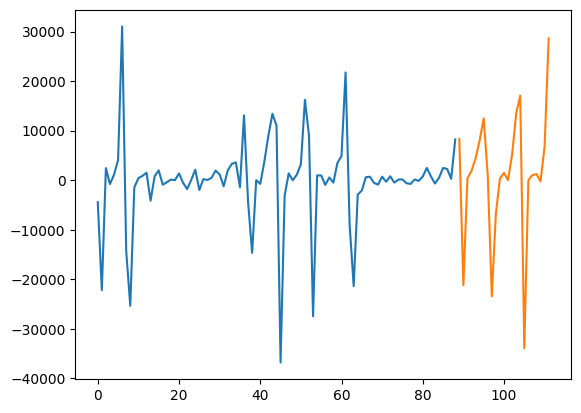

In [466]:
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test)

In [467]:
y_train.min(), y_test.min()

(-36806.65, -33935.88)

In [468]:
y_test.describe()

count       23.000000
mean      1130.966087
std      13229.973890
min     -33935.880000
25%          0.935000
50%       1226.810000
75%       7428.795000
max      28639.260000
Name: Weekly-Diff, dtype: float64

In [469]:
mean_norm = y_train.mean()
std_norm = y_train.std()

y_train = (y_train - mean_norm) / std_norm
y_test = (y_test - mean_norm) / std_norm

In [470]:
y_test.describe()

count    23.000000
mean      0.146524
std       1.498730
min      -3.825952
25%       0.018511
50%       0.157381
75%       0.859961
max       3.262745
Name: Weekly-Diff, dtype: float64

In [471]:
for column in x_train.columns:
    if x_train[column].max() > 1:
        x_mean_size = x_train[column].mean()
        x_std_size = x_train[column].std()

        x_train[column] = (x_train[column] - x_mean_size) / x_std_size
        x_test[column] = (x_test[column] - x_mean_size) / x_std_size

In [472]:
y_test

0     0.959351
1    -2.382800
2     0.059314
3     0.229178
4     0.514838
5     0.926076
6     1.430716
7     0.133469
8    -2.636706
9    -0.750015
10    0.055415
11    0.185010
12    0.019884
13    0.599810
14    1.545232
15    1.952327
16   -3.825952
17    0.017137
18    0.134751
19    0.157381
20   -0.010956
21    0.793845
22    3.262745
Name: Weekly-Diff, dtype: float64

In [473]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [474]:
x_train.shape[1]

56

In [475]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([89, 56]),
 torch.Size([89]),
 torch.Size([23, 56]),
 torch.Size([23]))

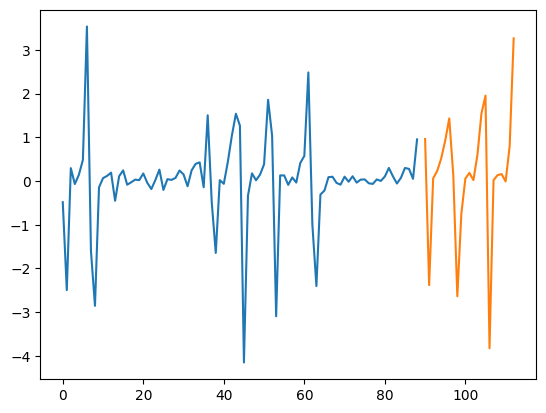

In [476]:
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_train) + 1, len(y_train) + 1 +len(y_test)), y_test)

In [539]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize: int):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, 1)

    def forward(self, x):
        out = self.linear(x)
        return out

def train_model_1(x_train, y_train, model, criterion, num_epochs):
    num_epochs = 200
    batch_size = 128
    lr = 0.01

    # Define an optimizer (Stochastic Gradient Descent)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    losses = []

    for epoch in range(num_epochs):
        running_loss = 0

        for batch in train_loader:
            inputs, targets = batch

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            print(inputs.isnan().sum())

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
                
        losses.append(running_loss / len(train_loader))

        print(f'Epoch [{epoch}], Running Loss: {running_loss:.4f}')

    return losses



model1 = linearRegression(x_train.shape[1])
criterion = torch.nn.MSELoss()

losses = train_model_1(x_train, y_train, model1, criterion, 10)

tensor(0)
Epoch [0], Running Loss: 1.0290
tensor(0)
Epoch [1], Running Loss: 1.0235
tensor(0)
Epoch [2], Running Loss: 1.0189
tensor(0)
Epoch [3], Running Loss: 1.0152
tensor(0)
Epoch [4], Running Loss: 1.0120
tensor(0)
Epoch [5], Running Loss: 1.0095
tensor(0)
Epoch [6], Running Loss: 1.0073
tensor(0)
Epoch [7], Running Loss: 1.0055
tensor(0)
Epoch [8], Running Loss: 1.0040
tensor(0)
Epoch [9], Running Loss: 1.0027
tensor(0)
Epoch [10], Running Loss: 1.0016
tensor(0)
Epoch [11], Running Loss: 1.0007
tensor(0)
Epoch [12], Running Loss: 0.9999
tensor(0)
Epoch [13], Running Loss: 0.9993
tensor(0)
Epoch [14], Running Loss: 0.9987
tensor(0)
Epoch [15], Running Loss: 0.9981
tensor(0)
Epoch [16], Running Loss: 0.9977
tensor(0)
Epoch [17], Running Loss: 0.9973
tensor(0)
Epoch [18], Running Loss: 0.9969
tensor(0)
Epoch [19], Running Loss: 0.9966
tensor(0)
Epoch [20], Running Loss: 0.9963
tensor(0)
Epoch [21], Running Loss: 0.9961
tensor(0)
Epoch [22], Running Loss: 0.9958
tensor(0)
Epoch [23],

/tmp/ipykernel_53930/2552725140.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))


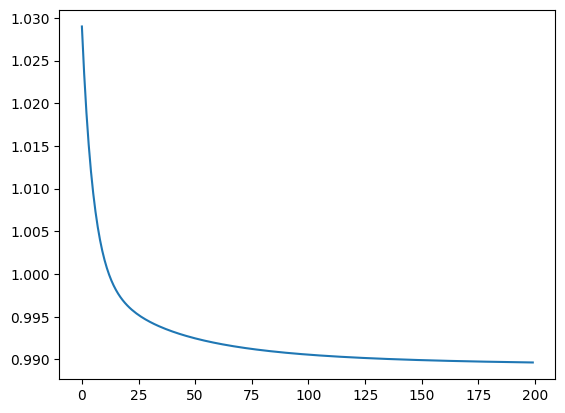

In [540]:
plt.plot(losses)

In [541]:
test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

running_loss = 0

results_target = []
results_output = []

for batch in test_loader:
    inputs, targets = batch

    outputs = model1(inputs)
    loss = criterion(outputs, targets)

    results_target += targets.detach().numpy().tolist()
    results_output += outputs.detach().numpy().tolist()

    running_loss += loss.item()
        
    print(f'Loss: {loss.item():.4f}')

target_loss = running_loss / len(test_loader)

print(f'Target: {target_loss:.4f} Running Loss: {running_loss:.4f}')

Loss: 2.1565
Target: 2.1565 Running Loss: 2.1565


/tmp/ipykernel_53930/3019564286.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))


In [542]:
results_output

[[0.056763142347335815],
 [0.062086254358291626],
 [0.1598784625530243],
 [0.07406236231327057],
 [0.023769743740558624],
 [0.030749738216400146],
 [0.010038264095783234],
 [0.08587022125720978],
 [0.08657220005989075],
 [0.11556553840637207],
 [0.1296316236257553],
 [0.02914726734161377],
 [0.06364783644676208],
 [0.061639562249183655],
 [0.085267573595047],
 [0.012541264295578003],
 [0.01597289741039276],
 [0.02026127278804779],
 [0.08135436475276947],
 [0.06693147122859955],
 [0.07771435379981995],
 [0.06051582098007202],
 [0.09605300426483154]]

In [543]:
results_output_view = [((x[0] * std_norm) + mean_norm) for x in results_output]

In [544]:
results_target_view = [((x * std_norm) + mean_norm) for x in results_target]

In [545]:
len(results_output_view), len(results_target_view)

(23, 23)

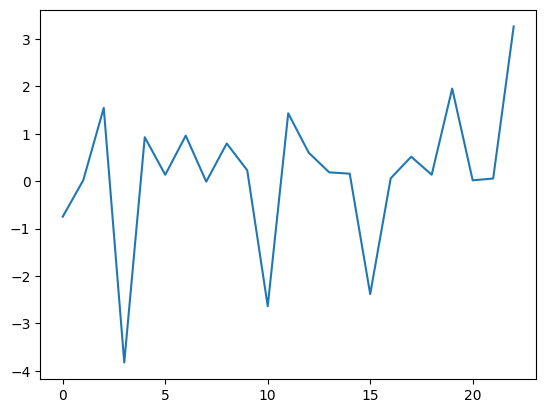

In [546]:
plt.plot(range(len(results_target)), results_target)

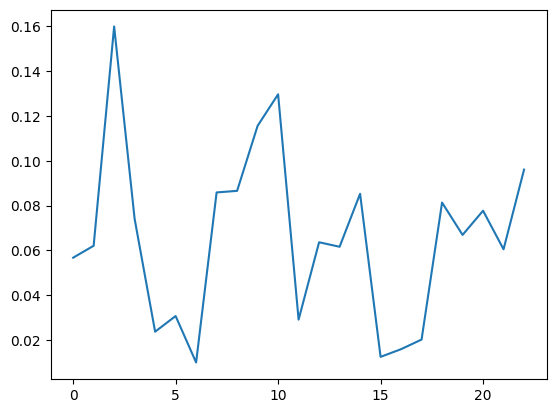

In [547]:
plt.plot(range(len(results_output)), results_output)

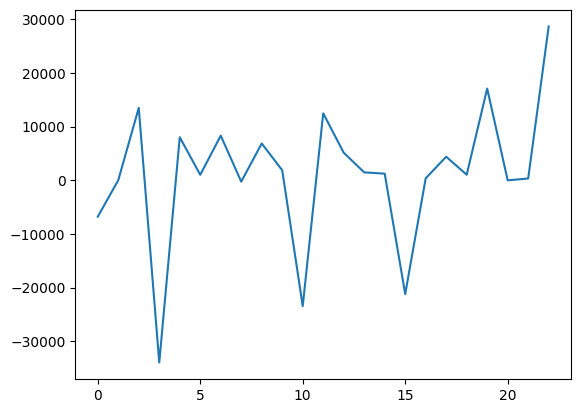

In [548]:
plt.plot(range(len(results_target_view)), results_target_view)

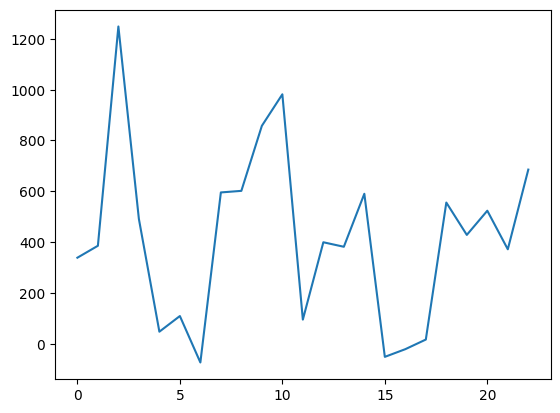

In [549]:
plt.plot(range(len(results_output_view)), results_output_view)

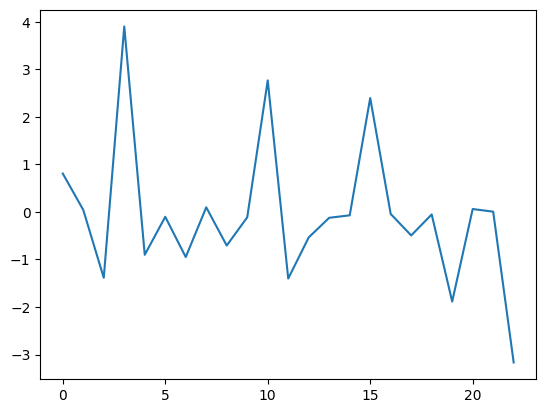

In [550]:
plt.plot(range(len(results_output)), [results_output[i][0] - results_target[i] for i in range(len(results_output))])

In [551]:
results_output

[[0.056763142347335815],
 [0.062086254358291626],
 [0.1598784625530243],
 [0.07406236231327057],
 [0.023769743740558624],
 [0.030749738216400146],
 [0.010038264095783234],
 [0.08587022125720978],
 [0.08657220005989075],
 [0.11556553840637207],
 [0.1296316236257553],
 [0.02914726734161377],
 [0.06364783644676208],
 [0.061639562249183655],
 [0.085267573595047],
 [0.012541264295578003],
 [0.01597289741039276],
 [0.02026127278804779],
 [0.08135436475276947],
 [0.06693147122859955],
 [0.07771435379981995],
 [0.06051582098007202],
 [0.09605300426483154]]